In [ ]:
!pip install umap-learn # unduh pustaka umap-learn

In [ ]:
from google.colab import drive # import modul drive dari google.colab, lalu gabungin ke lingkungan Colab.
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/"

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!ls

'Copy of embeddings.csv'  'Copy of Preprocess_1.ipynb'	        Untitled0.ipynb
'Copy of embed_new.csv'    data				        Untitled1.ipynb
'Copy of metadata.csv'	   DataAnalysis.ipynb		        Untitled2.ipynb
'Copy of meta_new.csv'	   PART-3-pytorch-custom-models.ipynb
'Copy of pca_data.npz'	   UMAP.ipynb


In [ ]:
!ls

'Copy of embeddings.csv'  'Copy of Preprocess_1.ipynb'	        Untitled0.ipynb
'Copy of embed_new.csv'    data				        Untitled1.ipynb
'Copy of metadata.csv'	   DataAnalysis.ipynb		        Untitled2.ipynb
'Copy of meta_new.csv'	   PART-3-pytorch-custom-models.ipynb
'Copy of pca_data.npz'	   UMAP.ipynb


In [ ]:
import pandas as pd
df = pd.read_csv('Copy of embed_new.csv')
display(df.head())

df = pd.read_csv('Copy of meta_new.csv')
display(df.head())

,site_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023
0,HRCE-1_10_AA08_1,2.297975,0.022587,0.195894,0.014781,-1.100471,0.098462,0.242965,0.199119,-0.567304,...,0.586100,0.781158,-1.187773,-1.368313,-1.659620,-0.020060,-0.498513,0.349791,-0.286453,-1.424416
1,HRCE-1_10_AA08_2,2.023117,0.055359,0.032669,-0.427921,-1.477027,0.555283,0.125149,0.024121,-0.310992,...,0.857226,0.687854,-1.667390,-1.059504,-1.597720,-0.335833,-0.643573,0.253038,0.145723,-1.794530
2,HRCE-1_10_AA08_3,2.311472,-0.001317,-0.237807,-0.174421,-1.027797,0.333306,0.646213,0.075742,-0.196632,...,0.798136,0.554682,-1.611646,-1.132473,-1.820604,0.127287,-0.792207,0.296043,-0.333672,-1.618949
3,HRCE-1_10_AA08_4,2.140031,-0.136464,-0.219615,0.169635,-1.099294,0.623271,0.449529,-0.265632,0.208191,...,0.495531,0.361196,-1.398734,-1.085089,-1.066442,-0.206999,-0.996809,0.255133,-0.056049,-1.397925
4,HRCE-1_10_AA10_4,2.725714,0.097124,-0.251666,-0.245772,-0.611061,0.599592,0.098196,-0.359271,0.068162,...,0.750727,0.885180,-1.421534,-1.284419,-1.417082,-0.065161,-0.390283,0.362758,0.033494,-1.130605


,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc
0,HRCE-1_1_J31_4,HRCE-1_1_J31,HRCE,HRCE-1,1,J31,4,Active SARS-CoV-2,Epalrestat,1.00
1,HRCE-1_12_V27_4,HRCE-1_12_V27,HRCE,HRCE-1,12,V27,4,Active SARS-CoV-2,Tolazamide,0.03
2,HRCE-2_22_Z27_2,HRCE-2_22_Z27,HRCE,HRCE-2,22,Z27,2,Active SARS-CoV-2,inimur,0.10
3,HRCE-2_19_AB23_3,HRCE-2_19_AB23,HRCE,HRCE-2,19,AB23,3,Active SARS-CoV-2,chloroxoquinoline,0.10
4,HRCE-2_14_D28_2,HRCE-2_14_D28,HRCE,HRCE-2,14,D28,2,Active SARS-CoV-2,Triacetin,1.00


In [ ]:
import numpy as np #impor pustaka numpy dan pandas
import pandas as pd


embed_df = pd.read_csv('Copy of embed_new.csv')
meta_df = pd.read_csv('Copy of meta_new.csv')

embed = embed_df.iloc[:, 1:].values



In [ ]:
import umap
import pandas as pd
import numpy as np


embed_df = pd.read_csv('Copy of embed_new.csv')
meta_df = pd.read_csv('Copy of meta_new.csv')


embed = embed_df.iloc[:, 1:].values


coloring_column = 'disease_condition'

reducer = umap.UMAP(n_components=2, random_state=42) #ngurangin dimensi jadi 2 dimensi
labels = meta_df[coloring_column].values
two_d_embeddings = reducer.fit_transform(embed)

print(f"Original embeddings shape: {embed.shape}")
print(f"2D embeddings shape: {two_d_embeddings.shape}") #hasilnya disimpan dalam bentuk rwo_d_embeddings

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Original embeddings shape: (27360, 1024)
2D embeddings shape: (27360, 2)


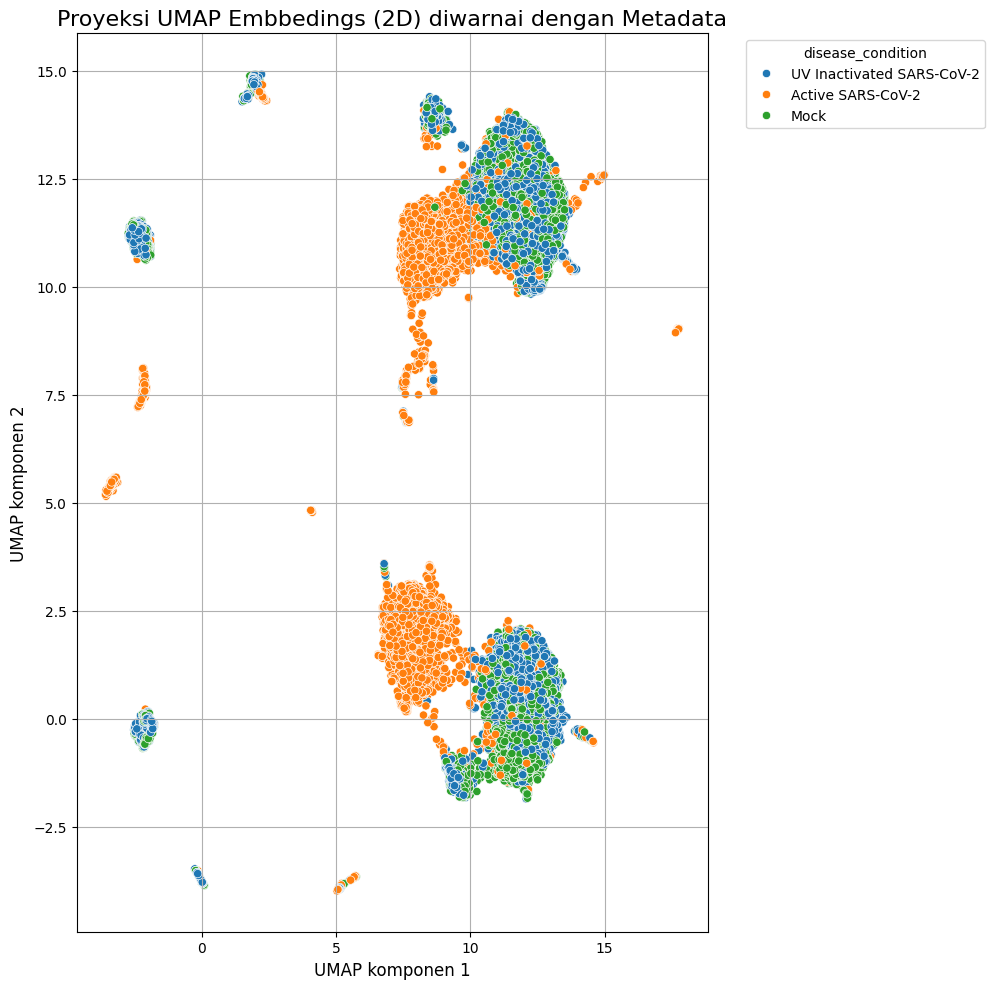

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10)) # Increased figure size for better visibility with legend

# Use seaborn.scatterplot with the 'hue' parameter for coloring
# Use the 'labels' variable obtained from the metadata
sns.scatterplot(
    x=two_d_embeddings[:, 0],
    y=two_d_embeddings[:, 1],
    hue=labels,  # Use the labels from metadata for coloring
)

plt.title('Proyeksi UMAP Embbedings (2D) diwarnai dengan Metadata', fontsize=16) # Added a more descriptive title
plt.xlabel('UMAP komponen 1', fontsize=12)
plt.ylabel('UMAP komponen 2', fontsize=12)
plt.grid(True)

# Add a legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=coloring_column)

# Adjust layout to prevent legend from overlapping the plot
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust rect based on legend position and size

plt.show()